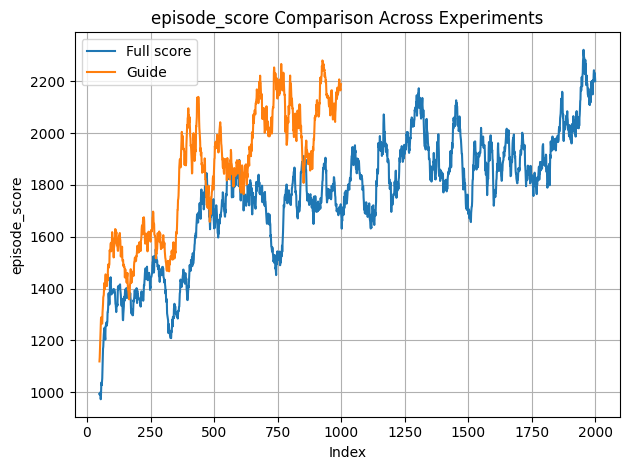

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV files
df1 = pd.read_csv(r'output\DQN_policy_exp5\train_log.csv')
df2 = pd.read_csv(r'output\DQN_policy_exp6\train_log.csv')

window = 50
# Plot all loss curves on the same figure
plt.plot(df1['episode_score'].rolling(window=window).mean(), label='Full score')
plt.plot(df2['episode_score'].rolling(window=window).mean(), label='Guide')


plt.xlabel('Index')
plt.ylabel('episode_score')
plt.title('episode_score Comparison Across Experiments')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



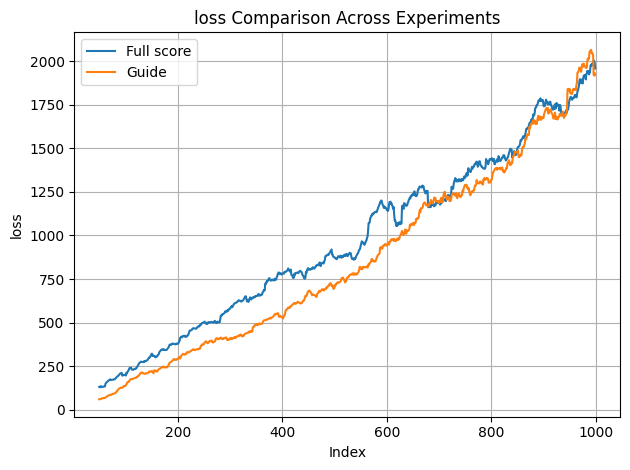

In [7]:
window = 50
# Plot all loss curves on the same figure
plt.plot(df1['loss'].rolling(window=window).mean(), label='Full score')
plt.plot(df2['loss'].rolling(window=window).mean(), label='Guide')


plt.xlabel('Index')
plt.ylabel('loss')
plt.title('loss Comparison Across Experiments')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


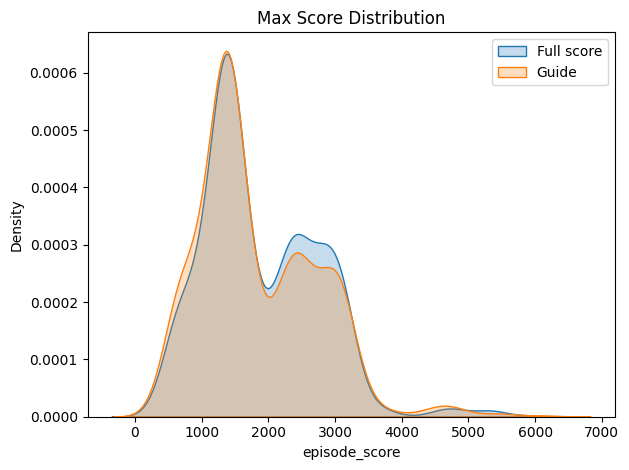

In [8]:
# Plot histogram
import seaborn as sns

sns.kdeplot(df1['episode_score'], label='Full score', fill=True)
sns.kdeplot(df2['episode_score'], label='Guide', fill=True)

plt.xlabel('episode_score')
plt.ylabel('Density')
plt.title('Max Score Distribution')
plt.legend()
plt.tight_layout()
plt.show()

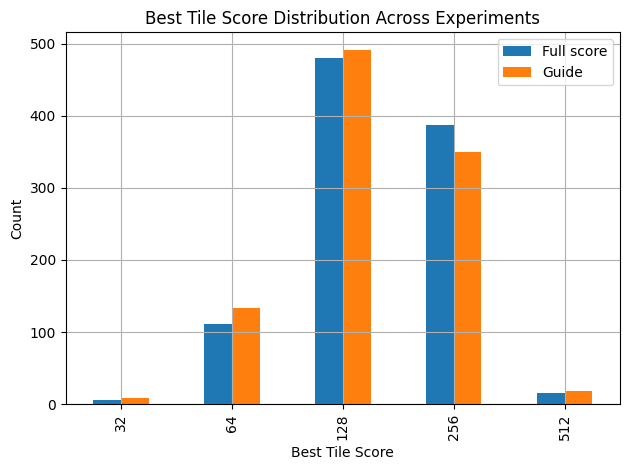

In [9]:
# Read CSVs

# Get value counts
counts1 = df1['best_tile_score'].value_counts().sort_index()
counts2 = df2['best_tile_score'].value_counts().sort_index()


# Combine into a DataFrame
all_scores = sorted(set(counts1.index).union(counts2.index))
combined = pd.DataFrame({
    'Full score': counts1.reindex(all_scores, fill_value=0),
    'Guide': counts2.reindex(all_scores, fill_value=0),
})

# Plot grouped bar chart
combined.plot(kind='bar')
plt.xlabel('Best Tile Score')
plt.ylabel('Count')
plt.title('Best Tile Score Distribution Across Experiments')
plt.grid(True)
plt.tight_layout()
plt.show()
